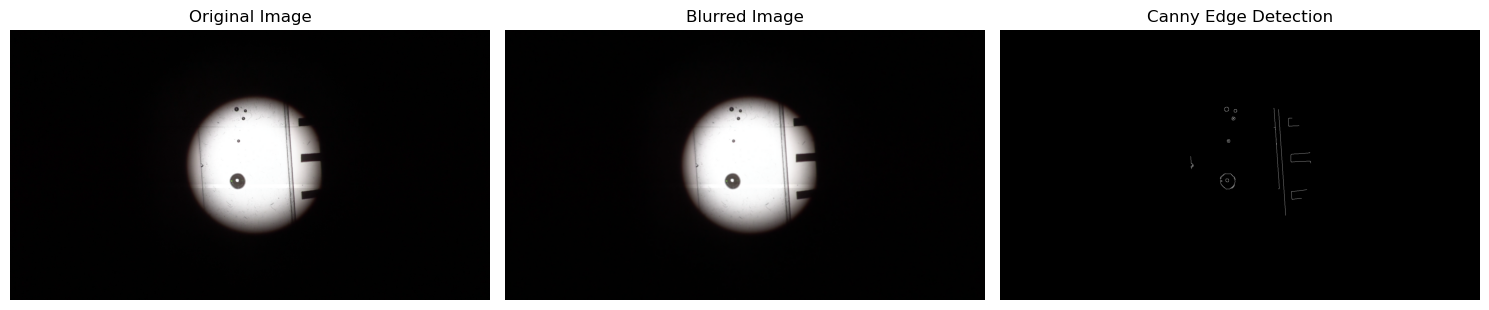

ZeroDivisionError: float division by zero

In [51]:
#輪郭検出の条件"
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
picture="C:\\Users\\flow\\Desktop\\bubble_rasing_result\\image\\picture106.bmp"
image = cv2.imread(picture, cv2.IMREAD_COLOR)  # BGR カラー画像として読み込み
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # グレースケールに変換
# 画像の平滑化（ガウシアンフィルタを使用）
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # カーネルサイズと標準偏差を設定
# Cannyエッジ検出
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=300)  # 適切な閾値を設定
cv2.imwrite("C:\\Users\\flow\\Desktop\\bubble_rasing_result\\edges106.bmp",edges)

# オリジナル画像、平滑化画像、Cannyエッジ検出結果を表示
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# 輪郭検出
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 周囲長フィルタリングの閾値を設定
min_contour_perimeter = 100  # この周囲長以下の輪郭は無視する
# 面積フィルタリングの閾値を設定
#min_contour_area = 700 # この面積以下の輪郭は無視する
# 位置フィルタリングの条件（画像内の特定の位置範囲を指定）
min_x = 770  # X座標の最小値
max_x = 1100  # X座標の最大値

# フィルタリングを行った輪郭を格納するリスト
filtered_contours = []
perimeter =[]

# 各輪郭に対して位置条件と面積をチェックし、条件を満たす輪郭のみを選択
for idx, contour in enumerate(contours):
    #contour_area = cv2.contourArea(contour)
    contour_perimeter = cv2.arcLength(contour, True)
    # 輪郭の重心を計算
    M = cv2.moments(contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # 位置条件をチェック
    if min_x <= cx <= max_x and contour_perimeter >= min_contour_perimeter:
        filtered_contours.append(contour)

# 各輪郭に対して処理を実行
for idx, cnt in enumerate(filtered_contours):
    # 輪郭を描画
    cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)
    # 輪郭番号を描画
    text_position = tuple(cnt[cnt[:, :, 1].argmin()][0])  # 輪郭の最上点を取得
    cv2.putText(image, str(idx), text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# 検出された輪郭の数を表示
num_contours = len(contours)
print("Number of Contours:", num_contours)


# 画像をBGRからRGBに変換して表示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
cv2.imwrite("C:\\Users\\flow\\Desktop\\bubble_rasing_result\\resultpicture106.bmp",image_rgb)





In [22]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
# ビデオデータの読み込み
filename = "C:\\Users\\flow\\Desktop\\bubbledate\\spherical bubbleGray.mp4"
base_path= "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\"
# 動画ファイルのベース名を取得
video_base_name = os.path.splitext(os.path.basename(filename))[0]

# 動画ごとのディレクトリを作成
video_directory = os.path.join(base_path, video_base_name)
os.makedirs(video_directory, exist_ok=True)  # 既に存在している場合は作成しない
# 新しいフォルダのベース名を指定
folder_names = ["image", "contours", "reslut", "graph"]

# 新しいフォルダを作成
for folder_name in folder_names:
    new_folder_path = os.path.join(video_directory, folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("総フレーム数: ", total_frame)
print("fps: ", fps)
print("動画の長さ: ", total_frame/fps, "[sec]")

frame_count = 0  # フレームのカウントを初期化

# グラフ用のデータ格納リスト
area_data = []
perimeter_data = []
moment_data = []


while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        # フレーム番号が30の倍数のときだけ処理を行う
        if frame_count % 30 == 0:
            num = frame_count // 30  # 画像ファイルの番号を計算
        # 各処理のpathをvideo_directoryに基づいて生成
            path = os.path.join(video_directory, "image\\")
            contours_path = os.path.join(video_directory, "contours\\")
            result_path = os.path.join(video_directory, "reslut\\")
            
            # 画像を保存
            image_path = path + "picture{:0=3}.bmp".format(num)
            cv2.imwrite(image_path, frame)

            # 画像を読み込み
            color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if color_image is None:
                print(f"Error: Failed to load image from {image_path}")
                sys.exit(1)  # スクリプトを終了する

            # グレースケールに変換
            gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

            # 画像の平滑化（ガウシアンフィルタを使用）
            blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1)

            # Cannyエッジ検出
            edges = cv2.Canny(blurred_image, threshold1=100, threshold2=250)

            # エッジ画像を保存
            edges_path = contours_path + "edges_picture{:0=3}.bmp".format(num)
            cv2.imwrite(edges_path, edges)

            # 輪郭検出
            contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            print(len(contours))
            
            # 動画ごとの条件セットを定義
            conditions = {
                #"min_contour_perimeter": 100,  # この周囲長以下の輪郭は無視する
                #"min_contour_area": 700,  # この面積以下の輪郭は無視する
                #"min_x": 780,  # X座標の最小値
                #"max_x": 1100  # X座標の最大値
            }
            
            # フィルタリングを行った輪郭を格納するリスト
            filtered_contours = []
            # 各輪郭に対して条件をチェックし、データを収集
            for idx, contour in enumerate(contours):
                contour_perimeter = cv2.arcLength(contour, True)
                contour_area = cv2.contourArea(contour)

                # 条件をチェック
                if (
                    ("min_x" not in conditions or conditions["min_x"] <= cx <= conditions["max_x"]) and
                    ("min_contour_perimeter" not in conditions or contour_perimeter >= conditions["min_contour_perimeter"]) and
                    ("min_contour_area" not in conditions or contour_area >= conditions["min_contour_area"])
                ):
                    
                    M = cv2.moments(contour)
                    if M['m00'] != 0:
                        cx = int(M['m10'] / M['m00'])
                        cy = int(M['m01'] / M['m00'])
                        
                    # 面積、周囲長、モーメントのデータを追加
                    area_data.append(contour_area)
                    perimeter_data.append(contour_perimeter)
                    moment_data.append(M)

                # 輪郭検出結果を保存（グリーン色で描画された画像）
                result_image = color_image.copy()
                cv2.drawContours(result_image, [contour], -1, (0, 255, 0), 2)
                # 輪郭番号を描画
                # 輪郭番号を描画する位置を中心座標に設定
                text_position = (cx, cy)
                cv2.putText(result_image, str(idx), text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                result_image_path = os.path.join(result_path, "result_picture{:0=3}.bmp".format(num))
                cv2.imwrite(result_image_path, result_image)
                    
            # 検出された輪郭の数を表示
            #num_contours = len(contours)
            #print("Number of Contours:", num_contours)

    else:
        break
    frame_count += 1

cap.release()  # カメラリソースの解放
cv2.destroyAllWindows()  # ウィンドウの破棄

総フレーム数:  449.0
fps:  29.97002997002997
動画の長さ:  14.981633333333333 [sec]
303
290
301
293
297
298
305
294
314
288
309
288
316
294
318
